In [350]:
import os
import glob
import gym
import gym_maze
import numpy as np
import random
import time
import tqdm
import json
from matplotlib import pyplot as plt

exps = list(glob.glob('./experiments/*'))

def get_exp_type(fname):
    return fname.split('/')[-1].split('_')[0]

data = []
for experiment in exps:
    d = json.load(open(experiment,'r'))
    name = get_exp_type(experiment)
    d['type'] = name.capitalize()
    d['label'] = f"{d['type']} Ep:{d['episode_n']} Traj n:{d['trajectory_n']} L:{d['lamd']} Q:{d['q_param']}"
    data.append(d)
data=list(sorted(data, key=lambda x: x['trajectory_n']+x['lamd']))

groups = set([d['trajectory_n'] for d in data])
types = set([d['type'] for d in data])

print(types,groups)

listyles = {"Laplase":'dashed','Policy':'solid','Cem': 'dotted'}

def graph_trajectory(data, trajectory_n):
    plt.figure(figsize=(20,8))
    print(trajectory_n)
    for ed in data:
        if  ed['trajectory_n'] != trajectory_n: continue
#         if  ed['lamd'] < 0.8: continue
#         if ed['type'] !='Cem': continue
#         if ed['episode_n'] != 20: continue
        episode_data = np.array(ed['episode_data'])
        lable = ed['label']
#         if ed['episode_n']
        plt.plot(range(len(episode_data)), 
                 episode_data[::,0],
#                  alpha=.8 if d['q_param'] == 0.9 else .1 ,
                 linestyle=listyles[ed['type']],
                 label=lable)
    leg = plt.legend(loc='lower right')
    #     break
    plt.show()

{'Cem', 'Det', 'Policy', 'Laplase'} {160, 320, 640, 1280, 100, 5, 2560, 5120, 40, 10, 80, 20, 30}


for group in sorted(groups):
# for group in groups:
    graph_trajectory(data, group)

In [264]:
def sample_policy(policy, action_n):
    ret_policy = np.zeros(policy.shape)
#     print(ret_policy)
    actions = np.arange(action_n)
    for i, p in enumerate(policy):
        idx =np.random.choice(actions, p=p)
#         print(idx)
        ret_policy[i][idx] = 1
    return ret_policy


In [285]:
policy = [
         [0.1,0.2,0.3,0.4],
         [0.4,0.2,0.3,0.1],
         [0.1,0.4,0.3,0.2]]

policy = np.array(policy)

total_sps = np.zeros(shape=(3,4))

for _ in range(100):
    total_sps += sample_policy(policy, 4)
    

In [286]:
total_sps

array([[14., 20., 26., 40.],
       [40., 22., 27., 11.],
       [ 6., 45., 25., 24.]])

In [284]:
np.array(sps[0])+np.array(sps[1])

array([[0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 2.]])

In [281]:
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
for sp in sps

In [37]:
def graph_trajectory(data, trajectory_n):
    plt.figure(figsize=(20,8))
    print(trajectory_n)
    for ed in data:
        episode_data = np.array(ed['episode_data'])
        lable = f"{ed['type']} Ep:{ed['episode_n']} Traj n:{ed['trajectory_n']} L:{ed['lamd']} Q:{ed['q_param']}"

        lable = ed['label']
#         if ed['episode_n']
        plt.plot(range(len(episode_data)), 
                 episode_data[::,0],
                 alpha=.8 if d['q_param'] == 0.9 else .1 ,
                 linestyle=listyles[ed['type']],
                 label=lable)
    leg = plt.legend(loc='lower right')
    #     break
    plt.show()

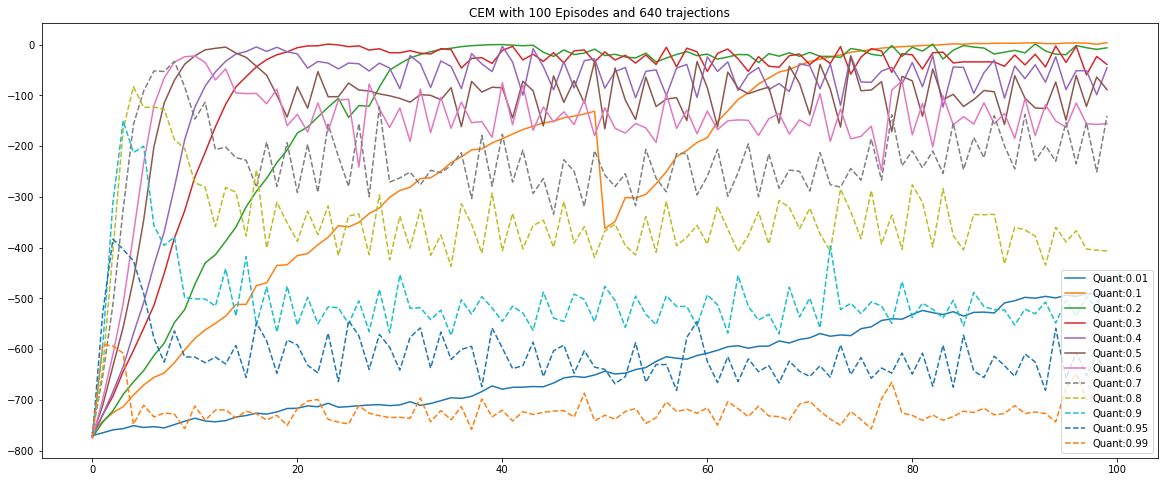

In [38]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: x['q_param']):
    if (ed['trajectory_n']!= 640
        or ed['type'] != 'Cem'
#         or len(ed['episode_data']) < 90 
       ): continue
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"Quant:{ed['q_param']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 6 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('CEM with 100 Episodes and 640 trajections')
    #     break
plt.show()

# fig = plt.figure(figsize =(10, 7))
# ax = fig.add_subplot(111)
# plt.figure(figsize=(10,4))
# box_plt = []
# lables = []
# print(name)
# for i, ed in enumerate(graph_data):
#     episode_data = np.array(ed['episode_data'])
#     lables.append(str(i+1)+' ' +ed['label'])
#     box_plot(ax, episode_data[::,0], [i], edge_color=type_colors[ed['type']])
# plt.show()
#     graph_trajectory(list(filter(lambda x: x['type'] == 'Cem', data)), group)

Text(0.5, 1.0, 'CEM with 100 Episodes, 0.2 Quantile but with different Number of Trajectories')

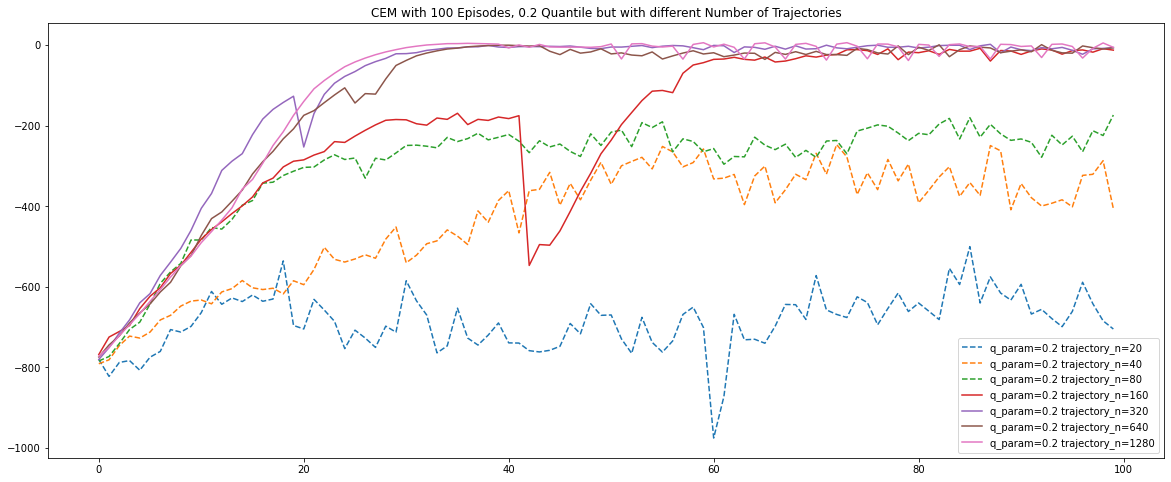

In [39]:
"""
CEM
100 эпизодов, 20 40 80 160 320 640 1280
"""

# for group in sorted(groups):
graph_data = []
target_episodes = set([20, 40, 80, 160, 320, 640, 1280])

for ed in sorted(data, key=lambda x: x['trajectory_n']):
    if (ed['type'] != 'Cem'
        or len(ed['episode_data']) != 100
        or ed['q_param'] != 0.2
        or not ed['trajectory_n'] in target_episodes
       ): continue
    target_episodes = target_episodes - set([ed['trajectory_n']])
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"q_param={ed['q_param']} trajectory_n={ed['trajectory_n']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
#              alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i < 3 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('CEM with 100 Episodes, 0.2 Quantile but with different Number of Trajectories')
    #     break
# plt.show()

# fig = plt.figure(figsize =(10, 7))
# ax = fig.add_subplot(111)
# plt.figure(figsize=(10,4))
# box_plt = []
# lables = []
# print(name)
# for i, ed in enumerate(graph_data):
#     episode_data = np.array(ed['episode_data'])
#     lables.append(str(i+1)+' ' +ed['label'])
#     box_plot(ax, episode_data[::,0], [i], edge_color=type_colors[ed['type']])
# plt.show()
#     graph_trajectory(list(filter(lambda x: x['type'] == 'Cem', data)), group)

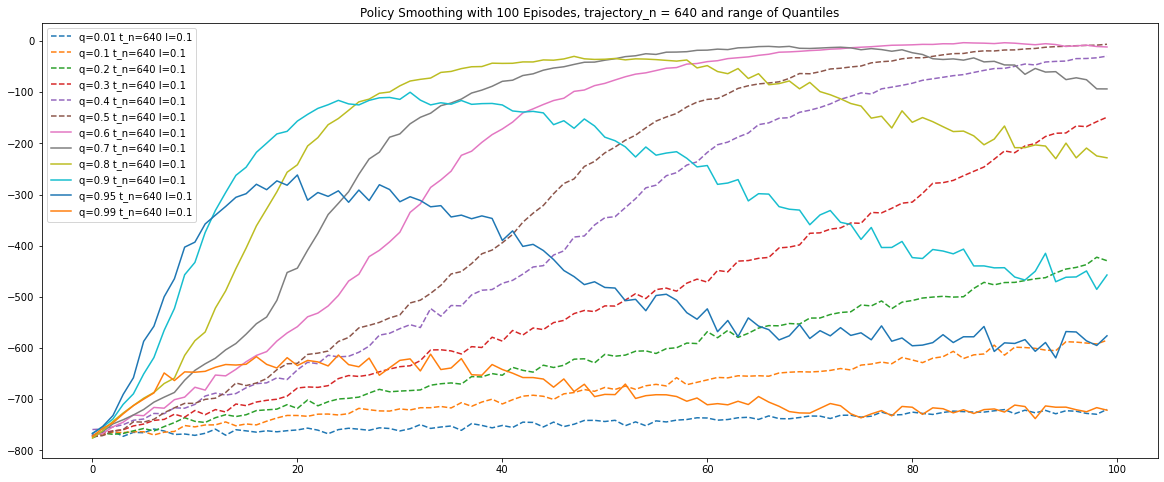

In [40]:
# for group in sorted(groups):
graph_data = []
# target_episodes = set([20, 40, 80, 160, 320, 640, 1280])
q_set = set()
for ed in sorted(data, key=lambda x: x['q_param']):
    if (ed['type'] != 'Policy'
        or ed['trajectory_n'] != 640
        or ed['q_param'] in q_set
#         or len(ed['episode_data']) != 160
#         or ed['q_param'] != 0.9
#         or not ed['trajectory_n'] in target_episodes
       ): continue
#     target_episodes = target_episodes - set([ed['trajectory_n']])
    q_set.add(ed['q_param'])
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"q={ed['q_param']} t_n={ed['trajectory_n']} l={ed['lamd']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
#              alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i < 6 else 'solid',
             label=lable)
    leg = plt.legend(loc='upper left')
plt.title('Policy Smoothing with 100 Episodes, trajectory_n = 640 and range of Quantiles')
    #     break
plt.show()

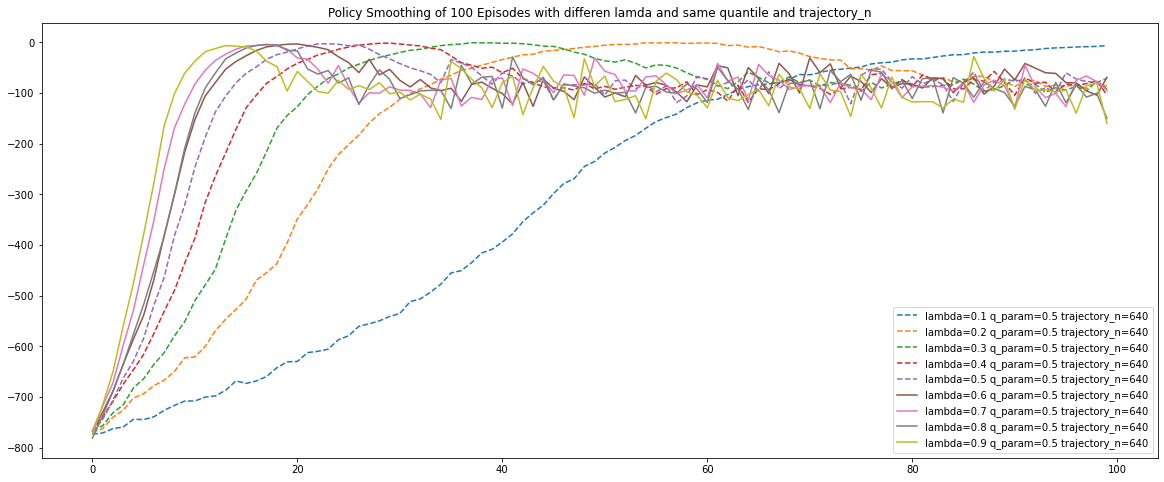

In [46]:
# for group in sorted(groups):
# график для отчета.
graph_data = []
target_episodes = set()#[20, 40, 80, 160, 320, 640, 1280])
q_set = set()
for ed in sorted(data, key=lambda x: x['lamd']*10+x['q_param']):
    if (ed['type'] != 'Policy'
        or ed['trajectory_n'] != 640
        or len(ed['episode_data']) != 100
        or ed['q_param'] != 0.5
#         or len(ed['episode_data']) != 160
#         or ed['q_param'] != 0.9
#         or ed['trajectory_n'] in target_episodes
       ): continue
#     target_episodes = target_episodes - set([ed['trajectory_n']])
    q_set.add(ed['q_param'])
    target_episodes.add(ed['trajectory_n'])
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"lambda={ed['lamd']} q_param={ed['q_param']} trajectory_n={ed['trajectory_n']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
#              alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i < 5 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('Policy Smoothing of 100 Episodes with differen lamda and same quantile and trajectory_n')
    #     break
plt.show()

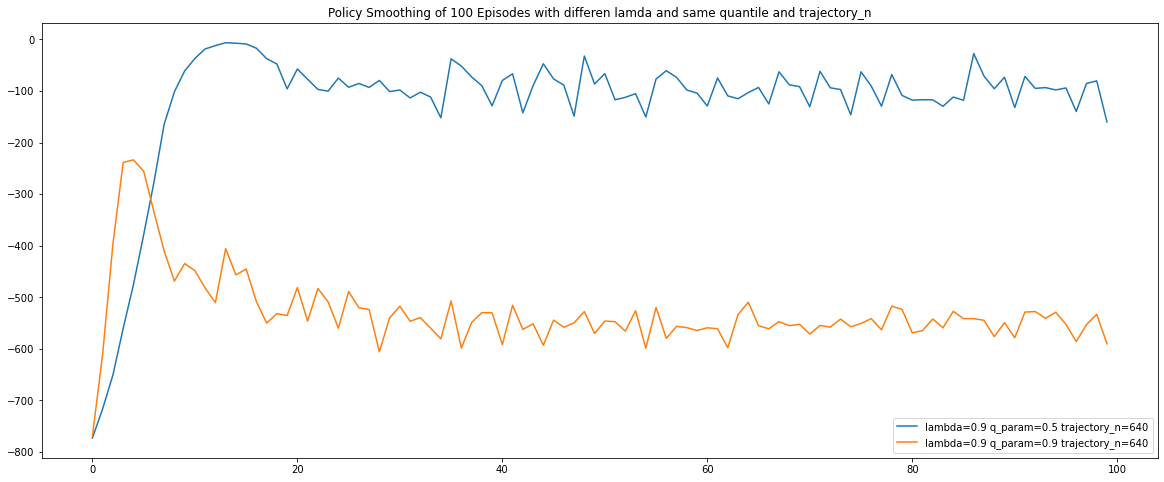

In [48]:
# for group in sorted(groups):
# график для отчета.
graph_data = []
target_episodes = set()#[20, 40, 80, 160, 320, 640, 1280])
q_set = set()
for ed in sorted(data, key=lambda x: x['lamd']*10+x['q_param']):
    if (ed['type'] != 'Policy'
        or ed['trajectory_n'] != 640
        or len(ed['episode_data']) != 100
#         or ed['q_param'] != 0.5
        or ed['lamd'] != 0.9
#         or len(ed['episode_data']) != 160
#         or ed['q_param'] != 0.9
#         or ed['trajectory_n'] in target_episodes
       ): continue
#     target_episodes = target_episodes - set([ed['trajectory_n']])
    q_set.add(ed['q_param'])
    target_episodes.add(ed['trajectory_n'])
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"lambda={ed['lamd']} q_param={ed['q_param']} trajectory_n={ed['trajectory_n']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
#              alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('Policy Smoothing of 100 Episodes with differen lamda and same quantile and trajectory_n')
    #     break
plt.show()

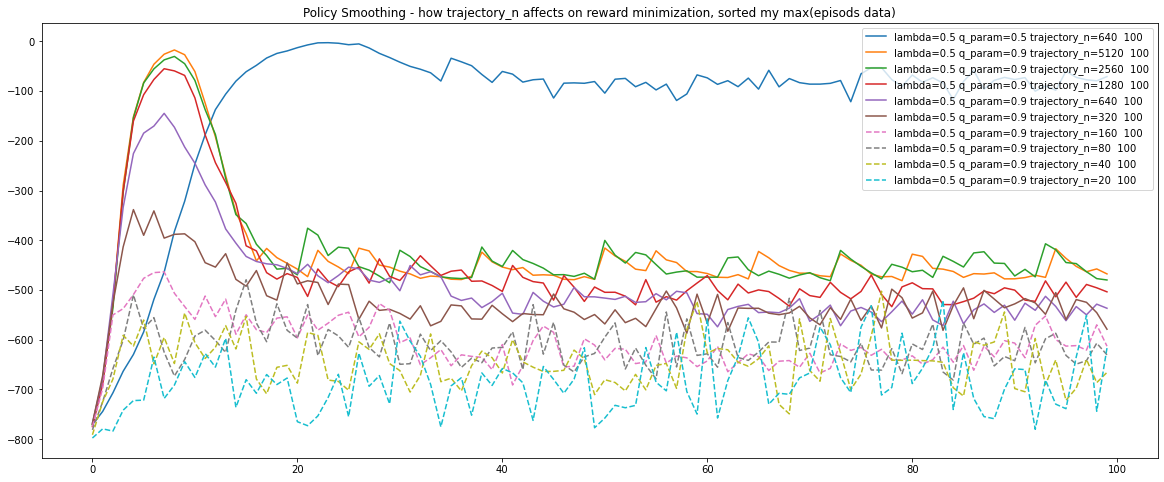

In [71]:
# график для отчета.
graph_data = []
target_episodes = set()#[20, 40, 80, 160, 320, 640, 1280])
q_set = set()
for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0])):
    if (ed['type'] != 'Policy'
#         or ed['trajectory_n'] != 640
        or len(ed['episode_data']) != 100
        or ed['q_param'] not in (0.9, 0.5)
        or ed['lamd'] != 0.5
#         or ed['q_param'] != 0.9
#         or ed['trajectory_n'] in target_episodes
       ): continue
#     target_episodes = target_episodes - set([ed['trajectory_n']])
    q_set.add(ed['q_param'])
    target_episodes.add(ed['trajectory_n'])
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"lambda={ed['lamd']} q_param={ed['q_param']} trajectory_n={ed['trajectory_n']}  {len(ed['episode_data'])}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
#              alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 5 else 'solid',
             label=lable)
    leg = plt.legend(loc='upper right')
plt.title('Policy Smoothing - how trajectory_n affects on reward minimization, sorted my max(episods data)')
    #     break
plt.show()

In [84]:
np.argmax(np.array(data[0]['episode_data'])[::,0])

94

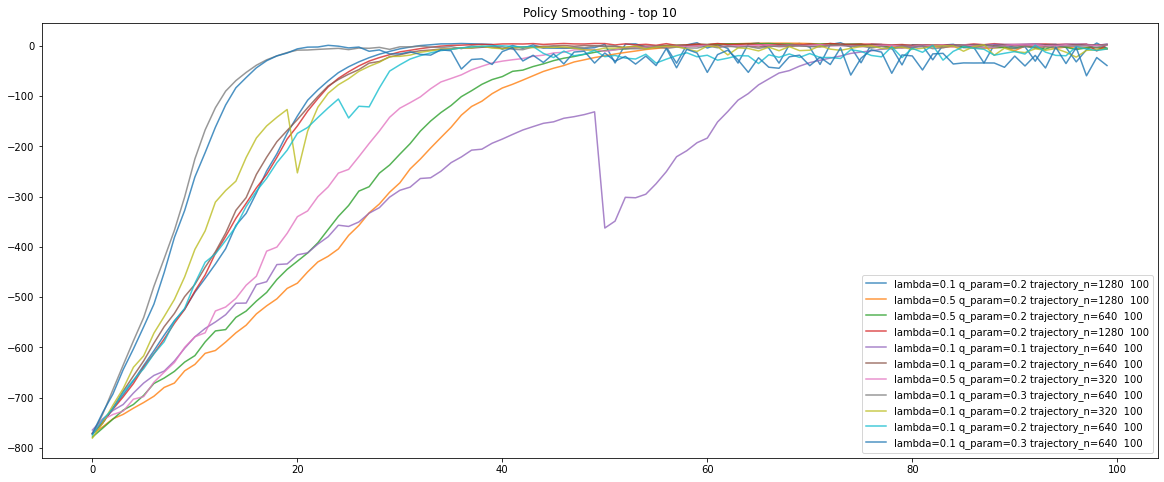

In [139]:
max_reward = []
for i, ed in enumerate(data):
    max_reward.append([i, np.max(np.array(ed['episode_data'])[::,0]),
    np.argmax(np.array(ed['episode_data'])[::,0])])

max_reward = list(filter(lambda x: x[1]>0, max_reward))

# график для отчета.
graph_data = []
target_episodes = set()#[20, 40, 80, 160, 320, 640, 1280])

plt.figure(figsize=(20,8))
for idx, mr, mr_pos in sorted(max_reward, key=lambda x: -x[1]):
    
    ed = data[idx]
    episode_data = np.array(ed['episode_data'])
    lable = f"lambda={ed['lamd']} q_param={ed['q_param']} trajectory_n={ed['trajectory_n']}  {len(ed['episode_data'])}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=0.8,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
#              linestyle = 'dashed' if i > 5 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('Policy Smoothing - top 10')
    #     break
plt.show()

In [140]:
df = pd.DataFrame([
    [ed['lamd'], ed['q_param'],ed['trajectory_n'], len(ed['episode_data']), np.max(np.array(ed['episode_data'])[::,0]), 
        np.argmax(np.array(ed['episode_data'])[::,0])]
        for ed in sorted(data, key=lambda x:-np.max(np.array(x['episode_data'])[::,0]))
], columns=['Lambda', 'Quantile', 'Trajectory_n', 'Episodes', 'MaxRewad', 'topEpisode'])

df[df['Trajectory_n']>320].head(40)

,Lambda,Quantile,Trajectory_n,Episodes,MaxRewad,topEpisode
0,0.10,0.2,1280,100,6.211719,73
1,0.50,0.2,1280,100,5.332031,67
2,0.50,0.2,640,100,4.729687,66
3,0.10,0.2,1280,100,4.636719,72
4,0.10,0.1,640,100,3.732813,99
5,0.10,0.2,640,100,2.429688,99
7,0.10,0.3,640,100,2.325000,99
9,0.10,0.2,640,100,1.314062,92
10,0.10,0.3,640,100,0.946875,23
11,0.20,0.5,640,100,-0.665625,56


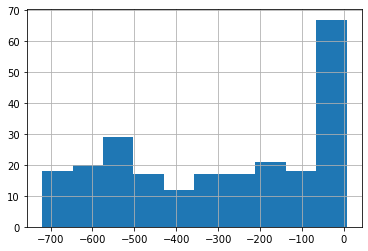

In [136]:
df.MaxRewad.hist()

In [227]:

    ret_u.append()

In [235]:
len(np.mean(ret_u, axis=1))

100

In [ ]:
# график для отчета.
graph_data = []
target_episodes = set()#[20, 40, 80, 160, 320, 640, 1280])
q_set = set()
for ed in sorted(data, key=lambda x:-np.max(x['episode_data'][::,0])):
    if (ed['type'] != 'Policy'
#         or ed['trajectory_n'] != 640
#         or len(ed['episode_data']) != 100
#         or ed['q_param'] not in (0.9, 0.5)
#         or ed['lamd'] != 0.5
#         or ed['q_param'] != 0.9
#         or ed['trajectory_n'] in target_episodes
       ): continue
#     target_episodes = target_episodes - set([ed['trajectory_n']])
    q_set.add(ed['q_param'])
    target_episodes.add(ed['trajectory_n'])
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"lambda={ed['lamd']} q_param={ed['q_param']} trajectory_n={ed['trajectory_n']}  {len(ed['episode_data'])}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
#              alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 5 else 'solid',
             label=lable)
    leg = plt.legend(loc='upper right')
plt.title('Policy Smoothing - how trajectory_n affects on reward minimization, sorted my max(episods data)')
    #     break
plt.show()

In [ ]:
"""
CEM
100 эпизодов, 20 40 80 160 320 640 1280
"""

# for group in sorted(groups):
graph_data = []
target_episodes = set([20, 40, 80, 160, 320, 640, 1280])

for ed in sorted(data, key=lambda x: x['trajectory_n']):
    if (ed['type'] != 'Policy'
        or len(ed['episode_data']) != 100
        or ed['q_param'] != 0.9
        or not ed['trajectory_n'] in target_episodes
       ): continue
    target_episodes = target_episodes - set([ed['trajectory_n']])
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"q_param={ed['q_param']} trajectory_n={ed['trajectory_n']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
#              alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i < 3 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('CEM with 100 Episodes, 0.2 Quantile but with different Number of Trajectories')
    #     break
plt.show()

# fig = plt.figure(figsize =(10, 7))
# ax = fig.add_subplot(111)
# plt.figure(figsize=(10,4))
# box_plt = []
# lables = []
# print(name)
# for i, ed in enumerate(graph_data):
#     episode_data = np.array(ed['episode_data'])
#     lables.append(str(i+1)+' ' +ed['label'])
#     box_plot(ax, episode_data[::,0], [i], edge_color=type_colors[ed['type']])
# plt.show()
# #     graph_trajectory(list(filter(lambda x: x['type'] == 'Cem', data)), group)

In [ ]:
# for group in sorted(groups):
graph_data = []
target_episodes = set([20, 40, 80, 160, 320, 640, 1280])

for ed in sorted(data, key=lambda x: ed['trajectory_n']):
#     if ed['trajectory_n']!= 160 : continue
    if ed['type'] != 'Policy': continue
    if ed['q_param'] != 0.2: continue
    if not ed['trajectory_n'] in target_episodes: continue
    target_episodes = target_episodes - set([ed['trajectory_n']])
    graph_data.append(ed)
# graph_data = graph_data[:8] + graph_data[-3:]
# graph_data = graph_data[7:-2]
plt.figure(figsize=(20,8))
for ed in graph_data:
    
    episode_data = np.array(ed['episode_data'])
    lable = f"{ed['trajectory_n']} q_param:{ed['q_param']} lambda:{ed['lamd']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle= 'dashed' if ed['q_param']==0.9 else 'solid', # listyles[ed['type']],
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('Policy Smoothing with 100 Episodes, 0.2 Quantile but with different Number of Trajectories')
plt.show()

In [ ]:
# for group in sorted(groups):
graph_data = []
target_episodes = set([20, 40, 80, 160, 320, 640, 1280])

for ed in sorted(data, key=lambda x: ed['trajectory_n']):
#     if ed['trajectory_n']!= 160 : continue
    if ed['type'] != 'Policy': continue
    if ed['q_param'] != 0.2: continue
    if not ed['trajectory_n'] in target_episodes: continue
    target_episodes = target_episodes - set([ed['trajectory_n']])
    graph_data.append(ed)
# graph_data = graph_data[:8] + graph_data[-3:]
# graph_data = graph_data[7:-2]
plt.figure(figsize=(20,8))
for ed in graph_data:
    
    episode_data = np.array(ed['episode_data'])
    lable = f"{ed['trajectory_n']} q_param:{ed['q_param']} lambda:{ed['lamd']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle= 'dashed' if ed['q_param']==0.9 else 'solid', # listyles[ed['type']],
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('Policy Smoothing with 100 Episodes, 0.2 Quantile but with different Number of Trajectories')
plt.show()

In [ ]:
# for group in sorted(groups):
graph_data = []
target_episodes = set([20, 40, 80, 160, 320, 640, 1280])

for ed in sorted(data, key=lambda x: ed['trajectory_n']):
#     if ed['trajectory_n']!= 160 : continue
    if ed['type'] != 'Policy': continue
    if ed['q_param'] != 0.2: continue
    if not ed['trajectory_n'] in target_episodes: continue
    target_episodes = target_episodes - set([ed['trajectory_n']])
    graph_data.append(ed)
# graph_data = graph_data[:8] + graph_data[-3:]
# graph_data = graph_data[7:-2]
plt.figure(figsize=(20,8))
for ed in graph_data:
    
    episode_data = np.array(ed['episode_data'])
    lable = f"{ed['trajectory_n']} q_param:{ed['q_param']} lambda:{ed['lamd']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle= 'dashed' if ed['q_param']==0.9 else 'solid', # listyles[ed['type']],
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('Policy Smoothing with 100 Episodes, 0.2 Quantile but with different Number of Trajectories')
plt.show()

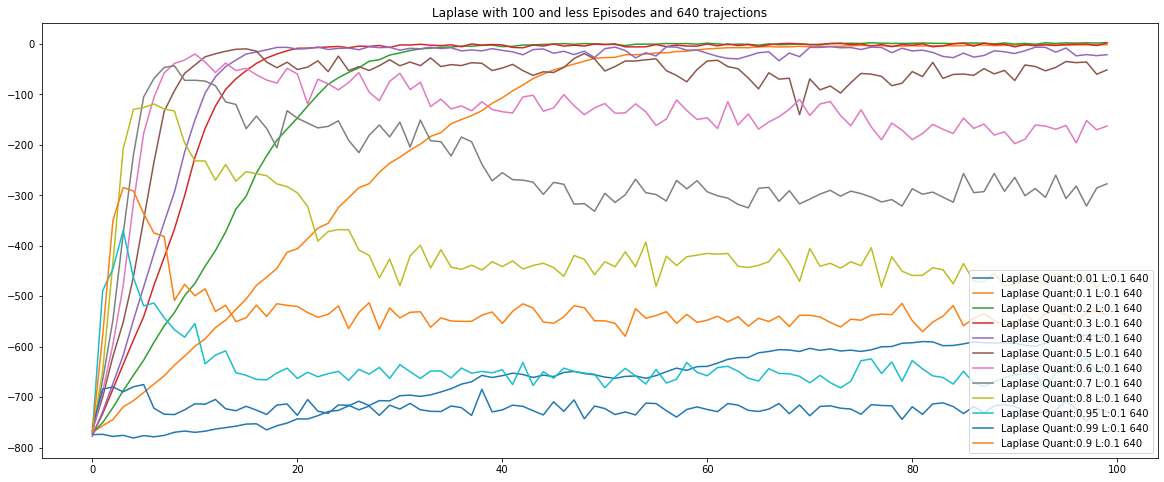

In [155]:
graph_data = []

for ed in sorted(data, key=lambda x: -x['lamd']):
    if ed['type'] != 'Laplase': continue
    if ed['trajectory_n']!= 640 : continue
#     if ed['q_param']!= 0.9 : continue
    if ed['lamd']!= 0.1 : continue
    if len(ed['episode_data']) < 100: continue
    graph_data.append(ed)
graph_data = graph_data
# graph_data = graph_data[:10]
plt.figure(figsize=(20,8))
# c = ['b','b','r','r','g','g','orange','orange','y','y']
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"{ed['type']} Quant:{ed['q_param']} L:{ed['lamd']} {ed['trajectory_n']}"
#     print(ed['type'])
#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
#              alpha=.1 if len(episode_data) > 99 else .9 ,
#              linestyle= 'dashed' if ed['type']=='Laplase' else 'solid', # listyles[ed['type']],
             linestyle= 'dashed' if len(ed['episode_data'])<50 else 'solid', # listyles[ed['type']],
#              color = c[i],
             label=lable)
    leg = plt.legend(loc='lower right')
# plt.xlim((0, 30))
plt.title('Laplase with 100 and less Episodes and 640 trajections')
    #     break
plt.show()

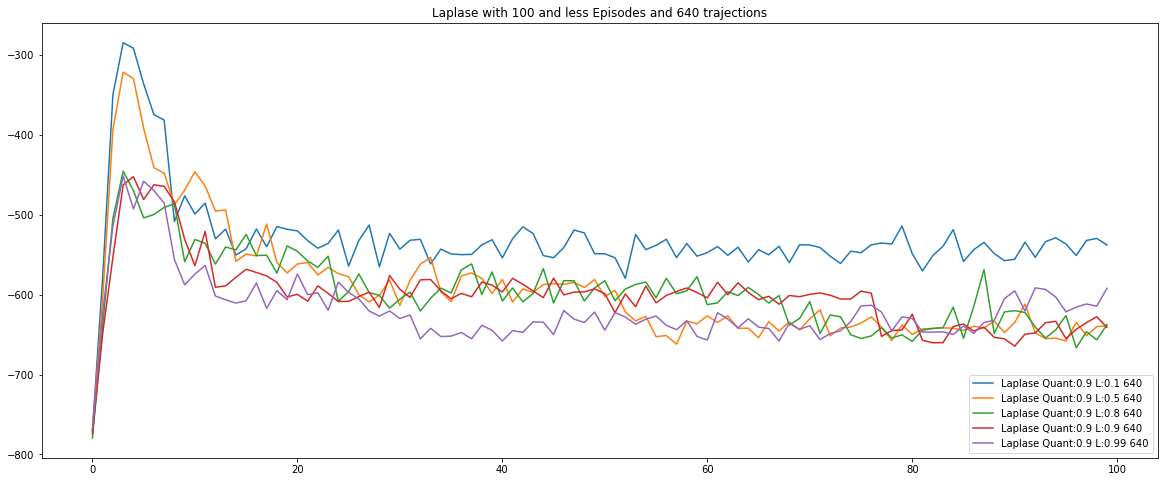

In [164]:
graph_data = []

for ed in sorted(data, key=lambda x: x['q_param']):
    if ed['type'] != 'Laplase': continue
    if ed['trajectory_n']!= 640 : continue
    if ed['q_param']!= 0.9 : continue
#     if ed['lamd']!= 0.1 : continue
    if len(ed['episode_data']) < 100: continue
    graph_data.append(ed)
graph_data = graph_data
# graph_data = graph_data[:10]
plt.figure(figsize=(20,8))
# c = ['b','b','r','r','g','g','orange','orange','y','y']
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"{ed['type']} Quant:{ed['q_param']} L:{ed['lamd']} {ed['trajectory_n']}"
#     print(ed['type'])
#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
#              alpha=.1 if len(episode_data) > 99 else .9 ,
             linestyle= 'dashed' if i > 5  else 'solid', # listyles[ed['type']],
#              linestyle= 'dashed' if len(ed['episode_data'])<50 else 'solid', # listyles[ed['type']],
#              color = c[i],
             label=lable)
    leg = plt.legend(loc='lower right')
# plt.xlim((0, 30))
plt.title('Laplase with 100 and less Episodes and 640 trajections')
    #     break
plt.show()

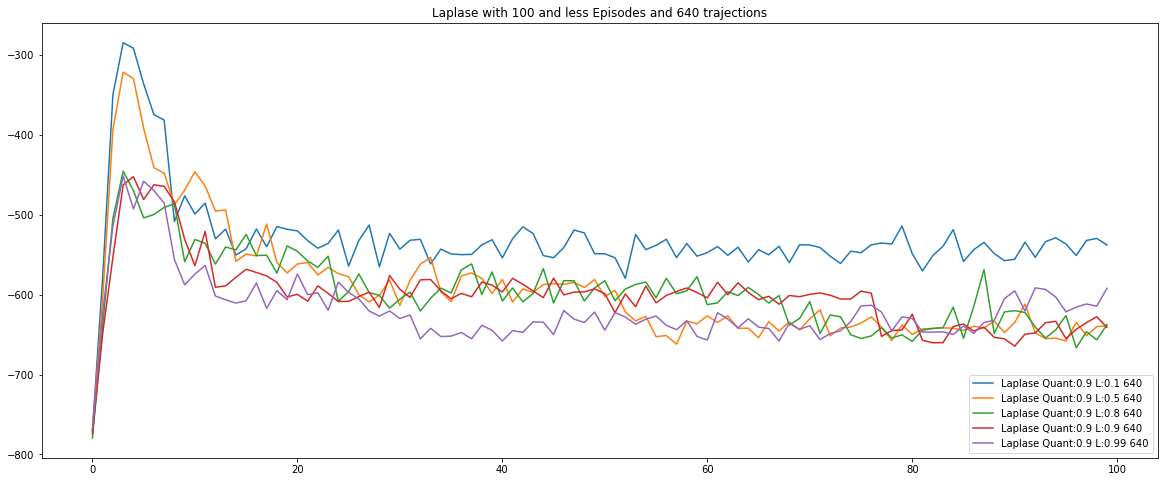

In [168]:
graph_data = []

for ed in sorted(data, key=lambda x: x['q_param']):
    if ed['type'] != 'Laplase': continue
    if ed['trajectory_n']!= 640 : continue
    if ed['q_param']!= 0.9 : continue
#     if ed['lamd']!= 0.1 : continue
    if len(ed['episode_data']) < 100: continue
    graph_data.append(ed)
graph_data = graph_data
# graph_data = graph_data[:10]
plt.figure(figsize=(20,8))
# c = ['b','b','r','r','g','g','orange','orange','y','y']
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"{ed['type']} Quant:{ed['q_param']} L:{ed['lamd']} {ed['trajectory_n']}"
#     print(ed['type'])
#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
#              alpha=.1 if len(episode_data) > 99 else .9 ,
             linestyle= 'dashed' if i > 5  else 'solid', # listyles[ed['type']],
#              linestyle= 'dashed' if len(ed['episode_data'])<50 else 'solid', # listyles[ed['type']],
#              color = c[i],
             label=lable)
    leg = plt.legend(loc='lower right')
# plt.xlim((0, 30))
plt.title('Laplase with 100 and less Episodes and 640 trajections')
    #     break
plt.show()

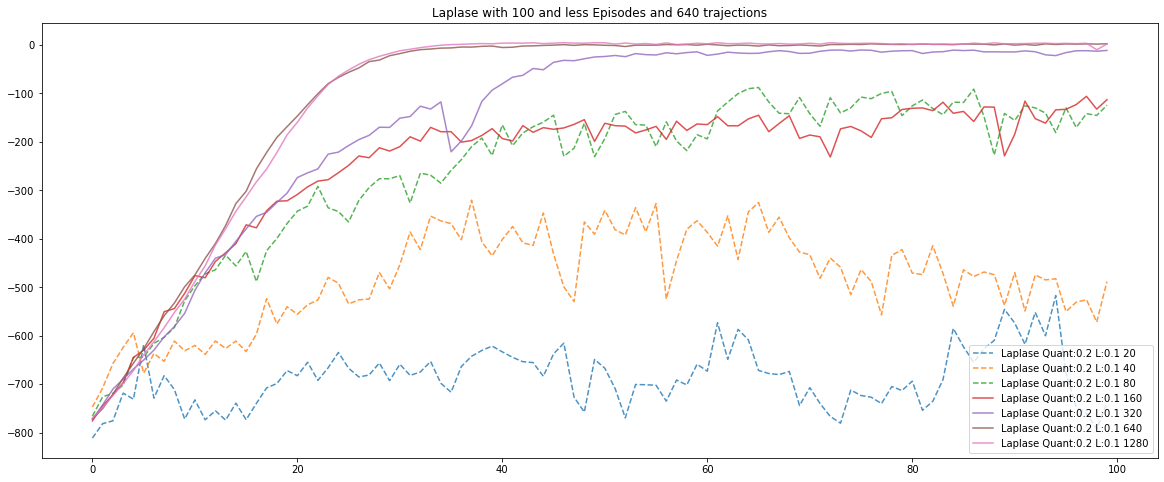

In [177]:
graph_data = []

for ed in sorted(data, key=lambda x: x['q_param']):
    if ed['type'] != 'Laplase': continue
#     if ed['trajectory_n']!= 1280 : continue
    if ed['q_param']!= 0.2 : continue
    if ed['lamd']!= 0.1 : continue
    if len(ed['episode_data']) != 100: continue
    graph_data.append(ed)
graph_data = graph_data
# graph_data = graph_data[:10]
plt.figure(figsize=(20,8))
# c = ['b','b','r','r','g','g','orange','orange','y','y']
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"{ed['type']} Quant:{ed['q_param']} L:{ed['lamd']} {ed['trajectory_n']}"
#     print(ed['type'])
#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=.8,
             linestyle= 'dashed' if i < 3  else 'solid', # listyles[ed['type']],
#              linestyle= 'dashed' if len(ed['episode_data'])<50 else 'solid', # listyles[ed['type']],
#              color = c[i],
             label=lable)
    leg = plt.legend(loc='lower right')
# plt.xlim((0, 30))
plt.title('Laplase with 100 and less Episodes and 640 trajections')
    #     break
plt.show()

In [ ]:
# comparing PS LS CEM
episodes_n = [100]
trajectories_len = [200]
trajectories_n =  [40,  160, 640, 2560]
q_params = [0.5]
lambdas = [0.5]


In [ ]:
[
    './experiments/cem_100_200_40_0.5_0.99.json',
    './experiments/cem_100_200_160_0.5_0.99.json',
    './experiments/cem_100_200_640_0.5_0.99.json',
    './experiments/cem_100_200_2560_0.5_0.99.json'
    './experiments/policy_100_200_40_0.5_0.5.json',
    './experiments/policy_100_200_160_0.5_0.5.json',
    './experiments/policy_100_200_640_0.5_0.5.json',
    './experiments/policy_100_200_2560_0.5_0.5.json'
    './experiments/laplase_100_200_40_0.5_0.5.json',
    './experiments/laplase_100_200_160_0.5_0.5.json',
    './experiments/laplase_100_200_640_0.5_0.5.json',
    './experiments/laplase_100_200_2560_0.5_0.5.json'
]
]

In [ ]:
json.load(open('./experiments/laplase_100_200_2.5_05.json'))

# json.load(open('./experiments/cem_100_200_640_0.5_0.1.json'))
json.load(open('./experiments/cem_100_200_2560'))

In [ ]:
trajectory_n

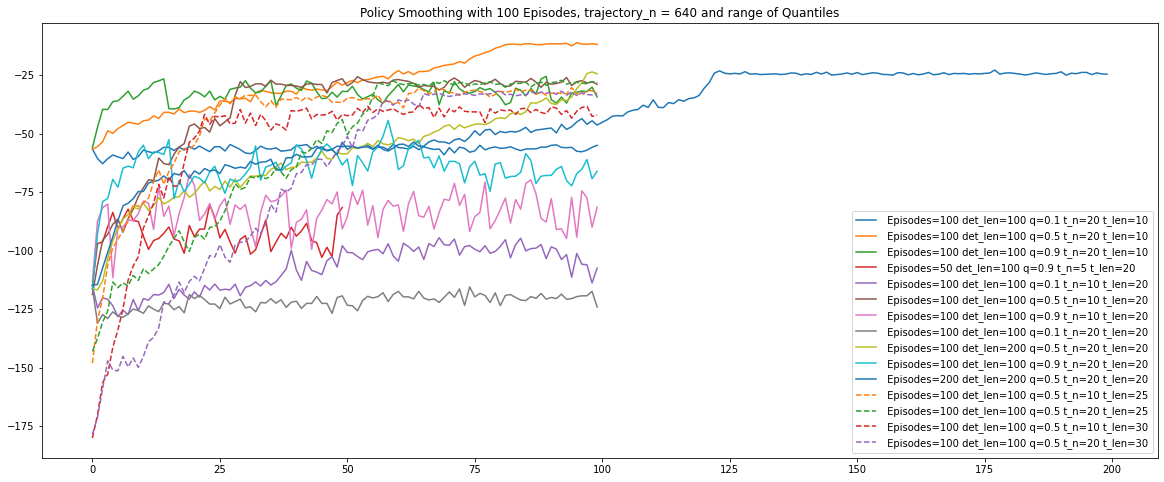

In [351]:
# for group in sorted(groups):
graph_data = []
# target_episodes = set([20, 40, 80, 160, 320, 640, 1280])
# q_set = set()
for ed in sorted(data, key=lambda x: x['trajectory_len']*100+ x['trajectory_n']):
    if (ed['type'] != 'Det'
        or ed['trajectory_len'] >= 200
        or ed['det_policy_n'] < 100
#         or ed['trajectory_n'] != 10
#         or ed['q_param'] in q_set
#         or len(ed['episode_data']) != 160
#         or ed['q_param'] != 0.9
#         or not ed['trajectory_n'] in target_episodes
       ): continue
#     target_episodes = target_episodes - set([ed['trajectory_n']])
#     q_set.add(ed['q_param'])
    graph_data.append(ed)

plt.figure(figsize=(20,8))
for i, ed in enumerate(graph_data):
#     print(ed)
    episode_data = np.mean([e[0] for e in ed['episode_data']], axis=1)
#     episode_data = np.array(ed['episode_data'])
#     print(episode_data)
    lable = f" Episodes={len(ed['episode_data'])} det_len={ed['det_policy_n']} q={ed['q_param']} t_n={ed['trajectory_n']} t_len={ed['trajectory_len']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data,
#              alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle = 'dashed' if i > 10 else 'solid',
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('Policy Smoothing with 100 Episodes, trajectory_n = 640 and range of Quantiles')
    #     break
plt.show()

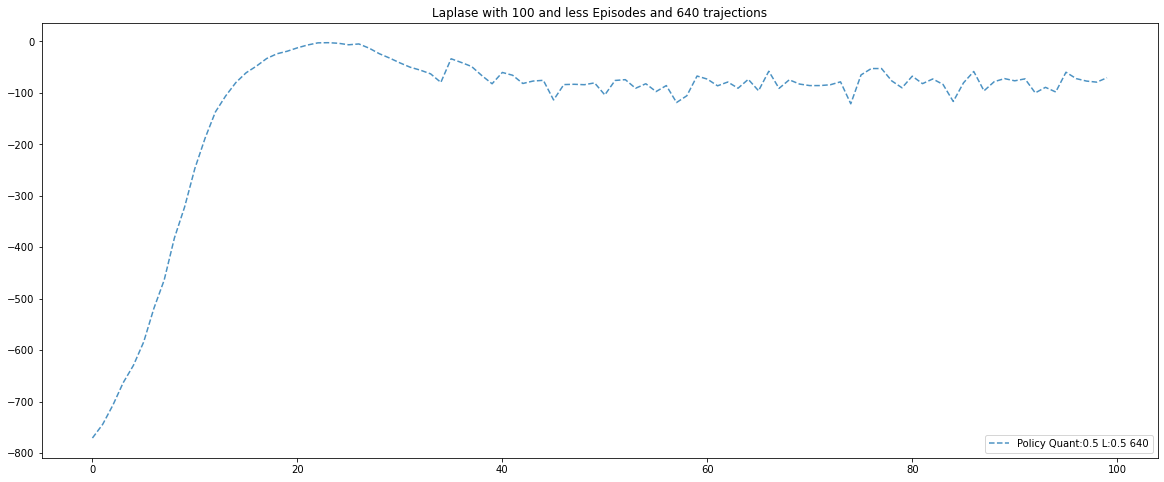

In [184]:
graph_data = []

for ed in sorted(data, key=lambda x: x['q_param']):
    if (ed['q_param']== 0.5 and ed['lamd']==0.5 and ed['trajectory_n'] in [40,  160, 640, 2560])  and len(ed['episode_data']) == 100: 
#     if ed['trajectory_n']!= 1280 : continue
#     if ed['q_param']!= 0.2 : continue
#     if ed['lamd']!= 0.1 : continue
#     if len(ed['episode_data']) != 100: continue
        graph_data.append(ed)
graph_data = graph_data
# graph_data = graph_data[:10]
plt.figure(figsize=(20,8))
# c = ['b','b','r','r','g','g','orange','orange','y','y']
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lable = f"{ed['type']} Quant:{ed['q_param']} L:{ed['lamd']} {ed['trajectory_n']}"
#     print(ed['type'])
#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=.8,
             linestyle= 'dashed' if i < 3  else 'solid', # listyles[ed['type']],
#              linestyle= 'dashed' if len(ed['episode_data'])<50 else 'solid', # listyles[ed['type']],
#              color = c[i],
             label=lable)
    leg = plt.legend(loc='lower right')
# plt.xlim((0, 30))
plt.title('Laplase with 100 and less Episodes and 640 trajections')
    #     break
plt.show()

In [ ]:
# for group in sorted(groups):
graph_data = []
target_episodes = set([20, 40, 80, 160, 320, 640, 1280])

for ed in sorted(data, key=lambda x: ed['trajectory_n']):
#     if ed['trajectory_n']!= 160 : continue
    if ed['type'] != 'Policy': continue
    if ed['q_param'] != 0.2: continue
    if not ed['trajectory_n'] in target_episodes: continue
    target_episodes = target_episodes - set([ed['trajectory_n']])
    graph_data.append(ed)
# graph_data = graph_data[:8] + graph_data[-3:]
# graph_data = graph_data[7:-2]
plt.figure(figsize=(20,8))
for ed in graph_data:
    
    episode_data = np.array(ed['episode_data'])
    lable = f"{ed['trajectory_n']} q_param:{ed['q_param']} lambda:{ed['lamd']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             linestyle= 'dashed' if ed['q_param']==0.9 else 'solid', # listyles[ed['type']],
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('Policy Smoothing with 100 Episodes, 0.2 Quantile but with different Number of Trajectories')
plt.show()

In [ ]:
# for group in sorted(groups):
graph_data = []
for ed in sorted(data, key=lambda x: -x['episode_data'][-1][0]):
    if ed['trajectory_n']!= 160 : continue
#     if ed['type'] != 'Cem': continue
    graph_data.append(ed)
graph_data = graph_data[:8]
plt.figure(figsize=(20,8))
for ed in graph_data:
    print(ed['episode_data'][-1][0])
    episode_data = np.array(ed['episode_data'])
    lable = f"{ed['type']} Quant:{ed['q_param']} L:{ed['lamd']}"

#         if ed['episode_n']
    plt.plot(range(len(episode_data)), 
             episode_data[::,0],
             alpha=1,#.9 if d['q_param'] == 0.9 else .9 ,
#              linestyle=listyles[ed['type']],
             label=lable)
    leg = plt.legend(loc='lower right')
plt.title('Best 8 results with 100 Episodes and 160 trajections')
    #     break
plt.show()

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.figure(figsize=(10,4))
box_plt = []
lables = []
print(name)
for i, ed in enumerate(graph_data):
    episode_data = np.array(ed['episode_data'])
    lables.append(str(i+1)+' ' +ed['label'])
    box_plot(ax, episode_data[::,0], [i], edge_color=type_colors[ed['type']])
plt.show()
#     graph_trajectory(list(filter(lambda x: x['type'] == 'Cem', data)), group)

In [ ]:

def box_trajectory(name, byfilter):
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_subplot(111)
    plt.figure(figsize=(10,4))
    box_plt = []
    lables = []
    print(name)
    for i, ed in enumerate(filter(byfilter, data)):
#         if byfilter(ed): continue
#         if ed['type'] != bytype: continue
        episode_data = np.array(ed['episode_data'])
        lables.append(str(i+1)+' ' +ed['label'])
#         box = ax.boxplot(episode_data[::,0], positions=[i])
        box_plot(ax, episode_data[::,0], [i], edge_color=type_colors[ed['type']])

        #         box_plt.append(episode_data[::,0])
#         ax.boxplot(box_plt)
#     plt.title(bytype)
    plt.show()
    print('\n'.join(lables))
    return None
    #     plt.hist(episode_data[::,0], alpha=0.2, bins=25)

In [ ]:
plt.figure(figsize=(10,4))
for ed in data:
#     if  ed['trajectory_n'] != 80: continue

    episode_data = np.array(ed['episode_data'])
    plt.hist(episode_data[::,0], alpha=0.5, bins=25)
    break
    

In [ ]:
def box_plot(ax, data, positions, edge_color='black', fill_color='white'):
    bp = ax.boxplot(data, positions=positions, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor= fill_color)       
        
    return bp

In [ ]:
types

In [ ]:
type_colors = {"Laplase":'red', 'Policy':'blue', 'Cem':'green'}

In [ ]:

def box_trajectory(name, byfilter):
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_subplot(111)
    plt.figure(figsize=(10,4))
    box_plt = []
    lables = []
    print(name)
    for i, ed in enumerate(filter(byfilter, data)):
#         if byfilter(ed): continue
#         if ed['type'] != bytype: continue
        episode_data = np.array(ed['episode_data'])
        lables.append(str(i+1)+' ' +ed['label'])
#         box = ax.boxplot(episode_data[::,0], positions=[i])
        box_plot(ax, episode_data[::,0], [i], edge_color=type_colors[ed['type']])

        #         box_plt.append(episode_data[::,0])
#         ax.boxplot(box_plt)
#     plt.title(bytype)
    plt.show()
    print('\n'.join(lables))
    return None
    #     plt.hist(episode_data[::,0], alpha=0.2, bins=25)

In [ ]:
types

for group in sorted(types):
    box_trajectory(str(group), lambda x: x['type'] == group)

In [ ]:
def box_plot(bygroup):
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_subplot(111)
    plt.figure(figsize=(10,4))
    box_plt = []
    lables = []
    print(bygroup)
    
    for i, ed in enumerate(data):
        if ed['trajectory_n'] != bygroup: continue
        episode_data = np.array(ed['episode_data'])
        lables.append(str(i+1)+' ' +ed['label'])
        box_plt.append(episode_data[::,0])
    ax.boxplot(box_plt)
#     plt.title(bytype)
    plt.show()
    print('\n'.join(lables))
    return None
    #     plt.hist(episode_data[::,0], alpha=0.2, bins=25)

In [ ]:
for tp in types:
    box_plot(tp)

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.figure(figsize=(10,4))
box_plt = []
lables = []
for i, ed in enumerate(data):
#     if  ed['trajectory_n'] != 80: continue
    episode_data = np.array(ed['episode_data'])
    trajectory_n = ed['trajectory_n']
    lambd = ed['lamd']
    lables.append(f'trajectory_n={trajectory_n} lambda={lambd}')
    box_plt.append(episode_data[::,0])
    print(i+1, lables[-1])
ax.boxplot(box_plt)
plt.show()
#     plt.hist(episode_data[::,0], alpha=0.2, bins=25)

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

plt.figure(figsize=(10,4))
box_plt = []
lables = []
for i, ed in enumerate(data):
#     if  ed['trajectory_n'] != 80: continue
    episode_data = np.array(ed['episode_data'])
    trajectory_n = ed['trajectory_n']
    lambd = ed['lamd']
    lables.append(f'trajectory_n={trajectory_n} lambda={lambd}')
    box_plt.append(episode_data[::,0])
    print(i+1, lables[-1])
ax.boxplot(box_plt)
plt.show()
#     plt.hist(episode_data[::,0], alpha=0.2, bins=25)

In [ ]:
plt.figure(figsize=(10,4))
for i, ed in enumerate(data):
#     if  ed['trajectory_n'] != 80: continue
    episode_data = np.array(ed['episode_data'])
    plt.boxplot(episode_data[::,0], i)

#     plt.hist(episode_data[::,0], alpha=0.2, bins=25)

In [ ]:
plt.figure(figsize=(10,4))
for ed in data:
    if  ed['trajectory_n'] != 40: continue

    episode_data = np.array(ed['episode_data'])
    plt.plot(range(len(episode_data)), episode_data[::,0], alpha=0.5)

In [ ]:
plt.figure(figsize=(10,4))
for ed in data:
    if  ed['trajectory_n'] != 80: continue

    episode_data = np.array(ed['episode_data'])
    plt.plot(range(len(episode_data)), episode_data[::,0], alpha=0.5)